In [438]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [439]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: generate_datasets.ipynb
  File: generate_dataset_hgb.ipynb
  File: generate_dataset_gradboost.ipynb
  File: gradboost_testing_features.ipynb


In [440]:
# pv_measurement for all training and validation rows
a_targets = pd.read_parquet('../data/A/train_targets.parquet')
b_targets = pd.read_parquet('../data/B/train_targets.parquet')
c_targets = pd.read_parquet('../data/C/train_targets.parquet')

# validation sets
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')

# training sets
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')

#test sets
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')

### Groups the rows with the same hour for location A

In [441]:
df = X_test_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_A = df


df = X_train_observed_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_A = df


df = X_train_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_A = df

### Groups the rows with the same hour for location B

In [442]:
df = X_test_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_B = df


df = X_train_observed_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_B = df


df = X_train_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_B = df

### Groups the rows with the same hour for location C

In [443]:
df = X_test_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_C = df


df = X_train_observed_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_C = df


df = X_train_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_C = df

#### Merging the training and validation set with the targets sets such that pv_measurement is added

In [444]:
training_A = training_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_A.drop('time', axis=1, inplace=True)

training_B = training_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_B.drop('time', axis=1, inplace=True)

training_C = training_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_C.drop('time', axis=1, inplace=True)

validation_A = validation_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_A.drop('time', axis=1, inplace=True)

validation_B = validation_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_B.drop('time', axis=1, inplace=True)

validation_C = validation_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_C.drop('time', axis=1, inplace=True)

In [445]:
'''
#training_C['pv_measurement'].fillna(1000, inplace=True)

# Convert the 'date_time' column to a datetime object
training_C['date_forecast'] = pd.to_datetime(training_C['date_forecast'])

# Create a helper column
training_C['month_day_time'] = training_C['date_forecast'].dt.strftime('%m-%d %H:%M:%S')

# Compute the mean for each group
mean_values = training_C.groupby('month_day_time')['pv_measurement'].transform('mean')

# Replace NaN values in 'PV_measurement' with the computed mean values
training_C['pv_measurement'].fillna(mean_values, inplace=True)

# Drop the helper column
training_C.drop('month_day_time', axis=1, inplace=True)

nan_count = training_C['pv_measurement'].isna().sum()
print(nan_count)
'''

"\n#training_C['pv_measurement'].fillna(1000, inplace=True)\n\n# Convert the 'date_time' column to a datetime object\ntraining_C['date_forecast'] = pd.to_datetime(training_C['date_forecast'])\n\n# Create a helper column\ntraining_C['month_day_time'] = training_C['date_forecast'].dt.strftime('%m-%d %H:%M:%S')\n\n# Compute the mean for each group\nmean_values = training_C.groupby('month_day_time')['pv_measurement'].transform('mean')\n\n# Replace NaN values in 'PV_measurement' with the computed mean values\ntraining_C['pv_measurement'].fillna(mean_values, inplace=True)\n\n# Drop the helper column\ntraining_C.drop('month_day_time', axis=1, inplace=True)\n\nnan_count = training_C['pv_measurement'].isna().sum()\nprint(nan_count)\n"

In [446]:
training_A['pv_measurement'] = training_A['pv_measurement'].replace(-0.0, 0.0)
training_B['pv_measurement'] = training_B['pv_measurement'].replace(-0.0, 0.0)
training_C['pv_measurement'] = training_C['pv_measurement'].replace(-0.0, 0.0)
validation_C['pv_measurement'] = validation_C['pv_measurement'].replace(-0.0, 0.0)
validation_A['pv_measurement'] = validation_A['pv_measurement'].replace(-0.0, 0.0)
validation_B['pv_measurement'] = validation_B['pv_measurement'].replace(-0.0, 0.0)

#### Plotting pv_measurement for all dataframes

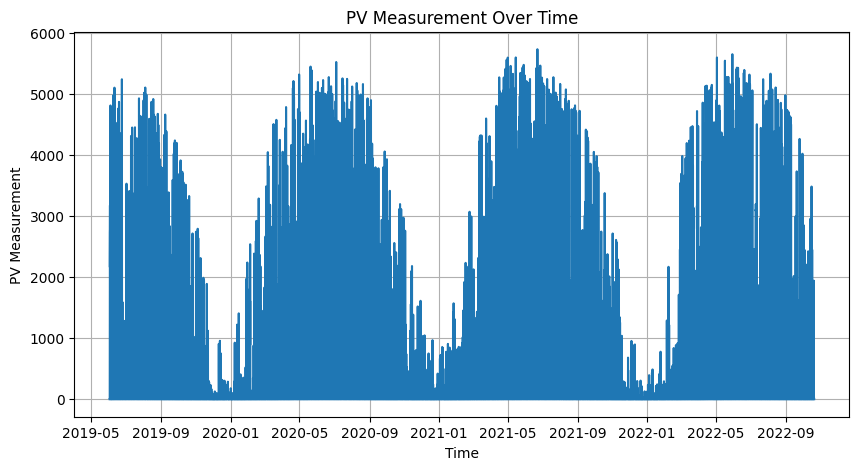

In [447]:
plt.figure(figsize=(10, 5))
plt.plot(training_A['date_forecast'], training_A['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

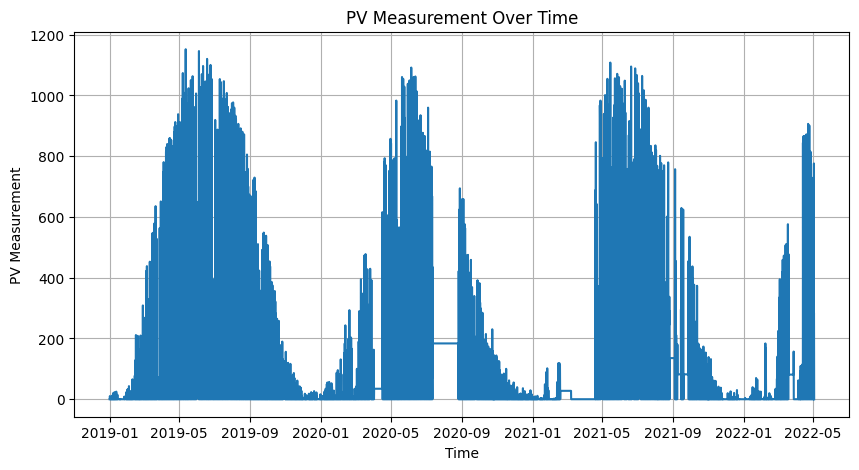

In [448]:
plt.figure(figsize=(10, 5))
plt.plot(training_B['date_forecast'], training_B['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

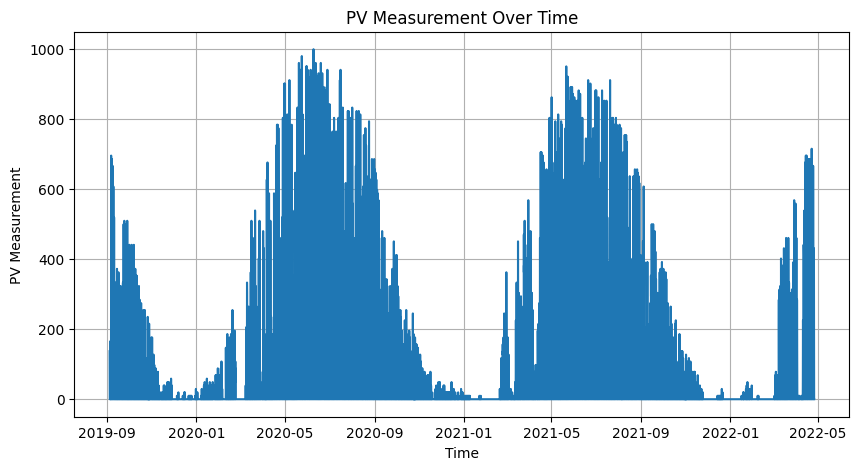

In [449]:
plt.figure(figsize=(10, 5))
plt.plot(training_C['date_forecast'], training_C['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

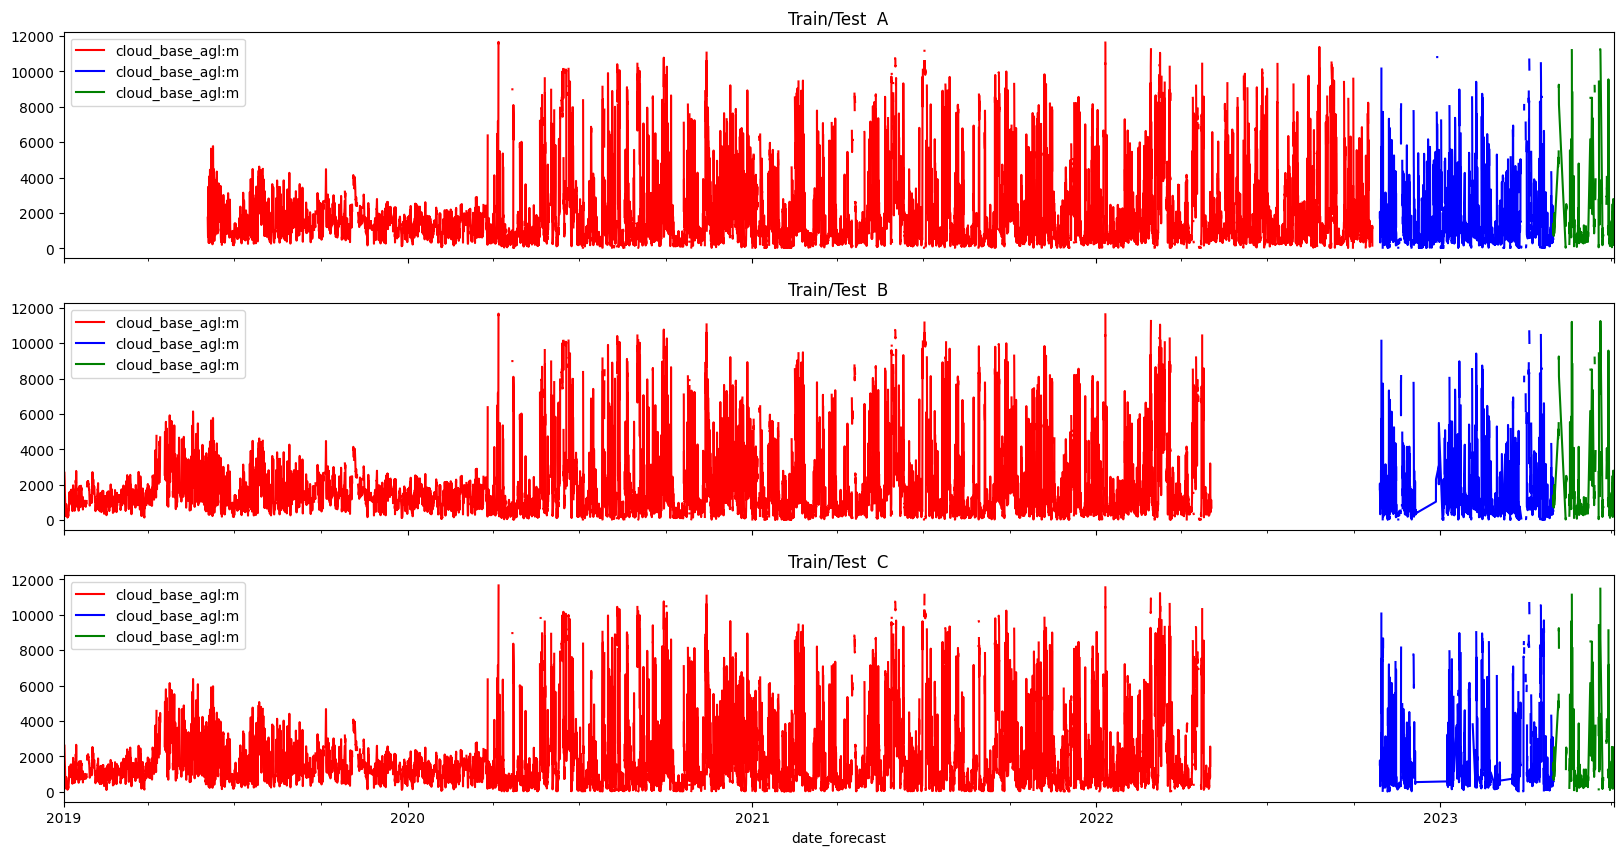

In [450]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'cloud_base_agl:m'
training_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
validation_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
test_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

training_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
validation_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
test_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

training_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
validation_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
test_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

### Endrer feature 'cloud-base-agl:m'

In [451]:
datasets = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

for dataset in datasets:

    dataset['date_forecast'] = pd.to_datetime(dataset['date_forecast'])

    # Create a helper column
    dataset['month_day_time'] = dataset['date_forecast'].dt.strftime('%m-%d %H:%M:%S')

    # Compute the mean for each group
    mean_values = dataset.groupby('month_day_time')['cloud_base_agl:m'].transform('mean')

    # Replace NaN values in 'PV_measurement' with the computed mean values
    dataset['cloud_base_agl:m'].fillna(mean_values, inplace=True)

    # Drop the helper column
    dataset.drop('month_day_time', axis=1, inplace=True)

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

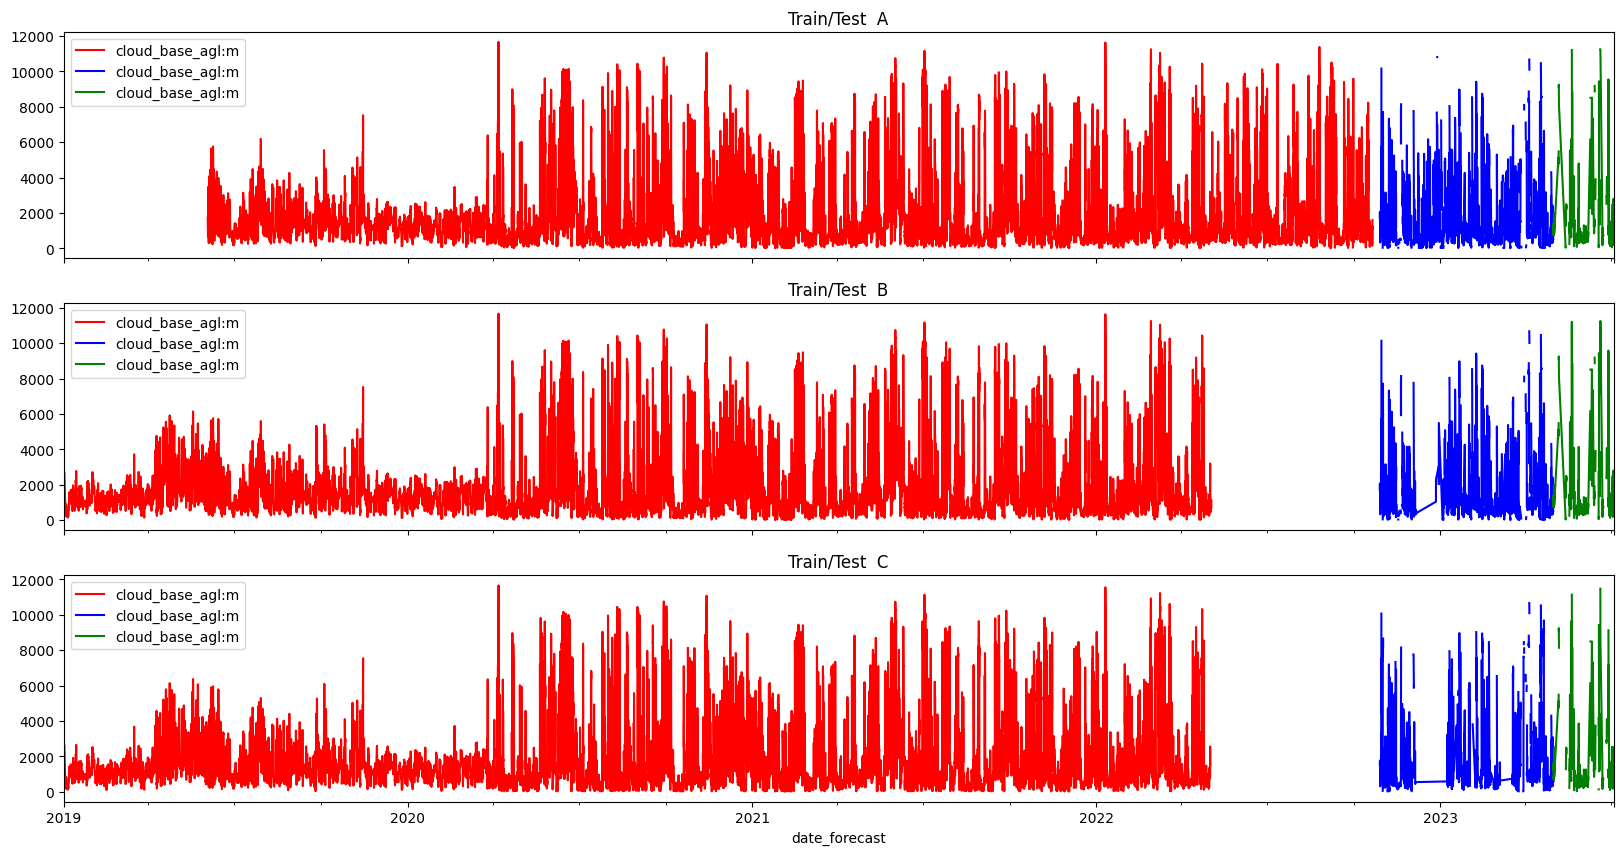

In [452]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'cloud_base_agl:m'
training_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
validation_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
test_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

training_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
validation_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
test_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

training_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
validation_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
test_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

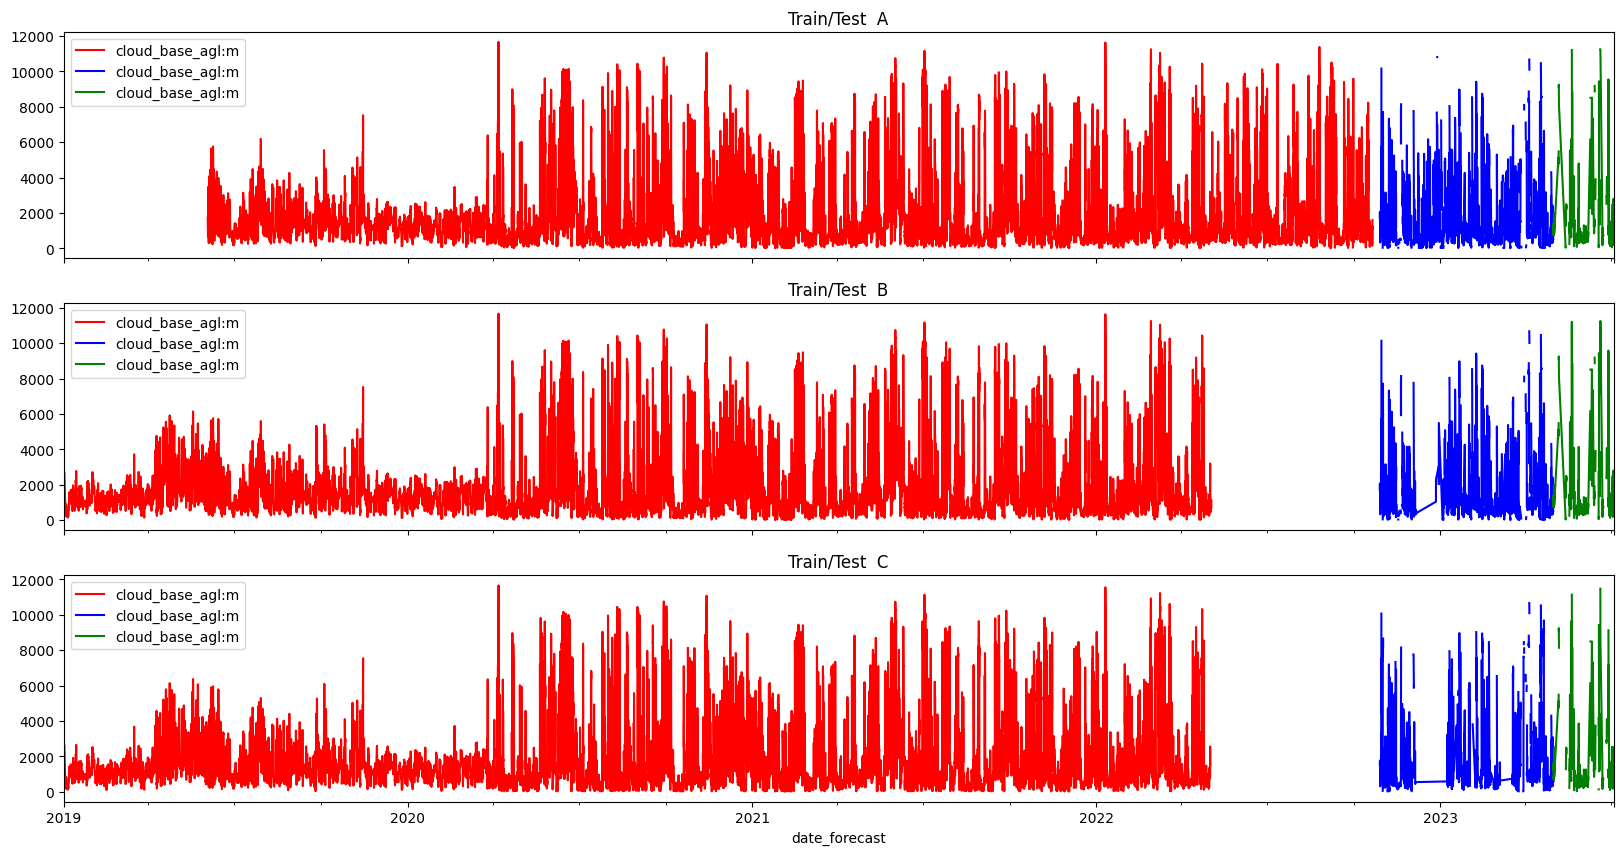

In [453]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'cloud_base_agl:m'
training_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
validation_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
test_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

training_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
validation_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
test_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

training_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
validation_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
test_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [454]:
insert_values = {
    124: 4000,
    125: 5000,
    145: 2450,
    146: 2500,
    147: 2550,
    148: 2600,
    149: 2650,
    150: 2700,
    151: 2750,
    417: 7000,
    484: 8000,
    485: 7500,
    486: 7000,
    487: 6500,
    488: 6000,
    489: 5000,
    490: 4000,
    491: 4500,
    580: 1000,
    581: 1500,
    582: 2000,
    583: 2200,
    599: 2000,
    596: 4026,
    576: 800,
    577: 850,
    578: 900,
    579: 950,
    546: 4000,
    547: 5000,
    548: 6000,
    549: 7142,
    511: 5000,
    501: 3500,
    502: 3200,
    503: 2900,
    480: 8600,
    481: 8400,
    482: 8200,
    483: 8100,
    473: 3000,
    474: 5000,
    475: 7000,
    428: 2870,
    429: 2800,
    430: 2700,
    420: 5000,
    413: 6300,
    414: 6500,
    415: 6700,
    416: 6900,
    190: 1200,
    191: 800,
    141: 2410,
    142: 2420,
    143: 2430,
    144: 2440,
    120: 2000,
    121: 2500,
    122: 3000,
    123: 3500,
    110: 6000,
    69: 1500,
    70: 1000,
    71: 500,
    53: 250,
    54: 550,
    55: 800,
    56: 1100,
    41: 7000
}


# Combine the existing 'insert_values' dictionary with 'insert_values_2' and the new rows and values
insert_values_2 = {
    52: 7000,
    53: 5800,
    54: 4600,
    55: 3400,
    56: 2200,
    122: 3000,
    123: 4000,
    124: 5000,
    125: 6000,
    126: 7000,
    145: 2400,
    146: 2450,
    147: 2500,
    148: 2550,
    149: 2600,
    150: 2650,
    151: 2700,
    417: 7000,
    477: 1340,
    478: 1339,
    479: 1335,
    480: 1330,
    481: 1336,
    482: 1328,
    483: 1329,
    484: 1341,
    485: 1337,
    486: 1330,
    487: 1329,
    488: 1328,
    489: 1327,
    580: 800,
    581: 1400,
    582: 1800,
    583: 2300,
    584: 2600,
    41: 7500,
    48: 7800,
    49: 7600,
    50: 7400,
    51: 7200,
    68: 1800,
    69: 1400,
    70: 1000,
    71: 500,
    79: 1500,
    110: 7000,
    118: 2200,
    119: 2400,
    120: 2600,
    121: 2800,
    141: 2370,
    142: 2380,
    143: 2390,
    144: 2398,
    189: 900,
    190: 800,
    191: 700,
    413: 6350,
    414: 6500,
    415: 6650,
    416: 6800,
    420: 5000,
    429: 2800,
    430: 2700,
    473: 1340,
    474: 1341,
    475: 1340,
    476: 1341,
    500: 3750,
    501: 3800,
    502: 3850,
    503: 3950,
    506: 2000,
    507: 800,
    510: 2500,
    511: 7000,
    546: 4000,
    547: 7000,
    548: 9000,
    576: 770,
    577: 780,
    578: 790,
    579: 795,
    596: 3700,
    599: 2500,
    610: 4000,
    611: 7000
}

# Update the 'cloud_base_agl:m' column with the specified values for the specified rows
test_A['cloud_base_agl:m'].update(pd.Series(insert_values))
test_B['cloud_base_agl:m'].update(pd.Series(insert_values))
test_C['cloud_base_agl:m'].update(pd.Series(insert_values_2))

Her må vi sette inn verdier for 2019; gjennomsnitt av andre år med samme dato ellers

In [455]:
#training_C['pv_measurement'].fillna(1000, inplace=True)

In [456]:
training_C.dropna(subset=['pv_measurement'], inplace=True)
training_B.dropna(subset=['pv_measurement'], inplace=True)

training_A.dropna(subset=['cloud_base_agl:m'], inplace=True)
training_B.dropna(subset=['cloud_base_agl:m'], inplace=True)
training_C.dropna(subset=['cloud_base_agl:m'], inplace=True)
validation_A.dropna(subset=['cloud_base_agl:m'], inplace=True)
validation_B.dropna(subset=['cloud_base_agl:m'], inplace=True)
validation_C.dropna(subset=['cloud_base_agl:m'], inplace=True)

In [457]:
nan_count = training_A.isna().sum()
#print(nan_count)

dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    if 'snow_density:kgm3' in df.columns:
        df.drop(columns=['snow_density:kgm3'], inplace=True)
        df.drop(columns=['ceiling_height_agl:m'], inplace=True)
        #df.drop(columns=['cloud_base_agl:m'], inplace=True)

### Trains HGB model for each location

### A

In [458]:
y_train = training_A['pv_measurement']

X_train = training_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_A['pv_measurement']

X_validate = validation_A.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [459]:
# Initialize the model (using GradientBoostingRegressor in this example)
modelA = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelA.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelA.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 119.16


In [460]:
feature_importances = modelA.feature_importances_

# Assuming you have a list of feature names in the same order as your data
feature_names = X_train.columns  # Replace with the actual feature names if needed

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

                           Feature  Importance
9                     direct_rad:W    0.778879
7                    diffuse_rad:W    0.107964
33                   sun_azimuth:d    0.021768
3                  clear_sky_rad:W    0.020358
40             wind_speed_u_10m:ms    0.006170
34                 sun_elevation:d    0.005638
2            clear_sky_energy_1h:J    0.005614
10                 direct_rad_1h:J    0.004762
6                   dew_point_2m:K    0.004628
36                     t_1000hPa:K    0.003978
41             wind_speed_v_10m:ms    0.003658
37             total_cloud_cover:p    0.003247
20                msl_pressure:hPa    0.002805
11         effective_cloud_cover:p    0.002803
8                 diffuse_rad_1h:J    0.002636
4                 cloud_base_agl:m    0.002617
21                  precip_5min:mm    0.002521
38                    visibility:m    0.002425
39               wind_speed_10m:ms    0.002291
0         absolute_humidity_2m:gm3    0.002169
22           

In [461]:
selected_features_A = feature_importance_df[feature_importance_df['Importance'] > 0]

modelA.fit(X_train[selected_features_A['Feature']], y_train)

# Make predictions on the test set
y_pred = modelA.predict(X_validate[selected_features_A['Feature']])

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 118.56


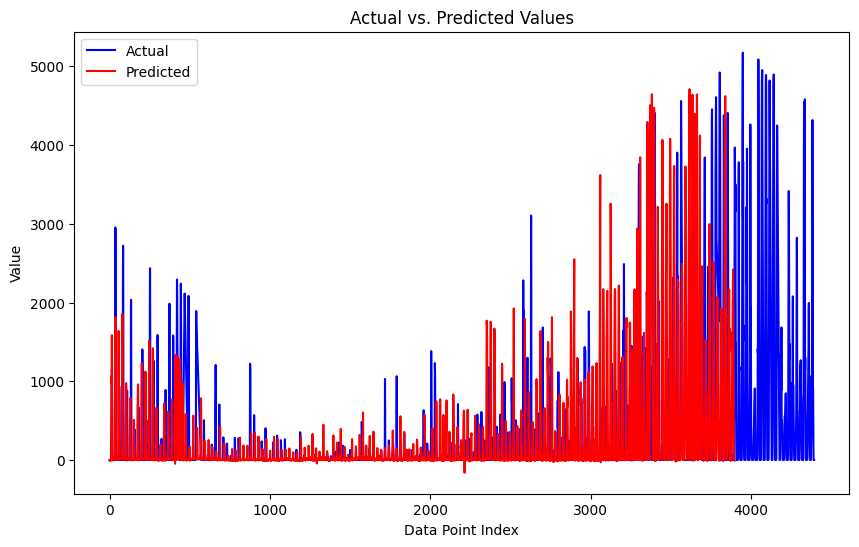

In [462]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

#### B

In [463]:
y_train = training_B['pv_measurement']

X_train = training_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_B['pv_measurement']

X_validate = validation_B.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [464]:
# Initialize the model (using GradientBoostingRegressor in this example)
modelB = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelB.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelB.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 20.06


In [465]:
feature_importances = modelB.feature_importances_

# Assuming you have a list of feature names in the same order as your data
feature_names = X_train.columns  # Replace with the actual feature names if needed

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

                           Feature  Importance
34                 sun_elevation:d    0.675304
9                     direct_rad:W    0.152090
4                 cloud_base_agl:m    0.021402
3                  clear_sky_rad:W    0.017609
7                    diffuse_rad:W    0.013648
33                   sun_azimuth:d    0.012841
6                   dew_point_2m:K    0.010136
36                     t_1000hPa:K    0.009858
10                 direct_rad_1h:J    0.007992
1              air_density_2m:kgm3    0.006772
23               pressure_100m:hPa    0.006389
11         effective_cloud_cover:p    0.006354
2            clear_sky_energy_1h:J    0.006279
27     relative_humidity_1000hPa:p    0.006143
0         absolute_humidity_2m:gm3    0.005647
37             total_cloud_cover:p    0.005448
40             wind_speed_u_10m:ms    0.005392
41             wind_speed_v_10m:ms    0.005209
38                    visibility:m    0.004419
28                sfc_pressure:hPa    0.004103
8            

In [466]:
selected_features_B = feature_importance_df[feature_importance_df['Importance'] > 0]

modelB.fit(X_train[selected_features_B['Feature']], y_train)

# Make predictions on the test set
y_pred = modelB.predict(X_validate[selected_features_B['Feature']])

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 20.06


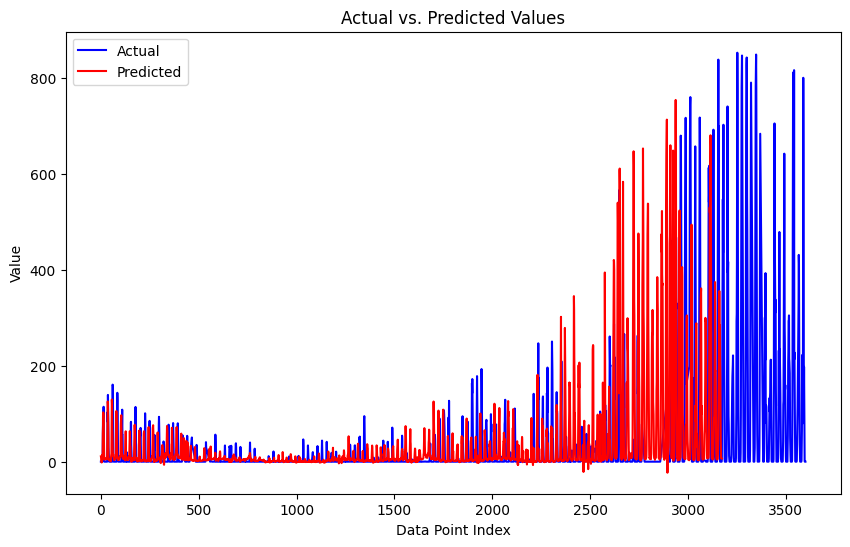

In [467]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

#### C

In [468]:
y_train = training_C['pv_measurement']

X_train = training_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_C['pv_measurement']

X_validate = validation_C.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [469]:
# Initialize the model (using GradientBoostingRegressor in this example)
modelC = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelC.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelC.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 18.35


In [470]:
feature_importances = modelC.feature_importances_

# Assuming you have a list of feature names in the same order as your data
feature_names = X_train.columns  # Replace with the actual feature names if needed

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

                           Feature  Importance
34                 sun_elevation:d    0.518027
9                     direct_rad:W    0.154616
3                  clear_sky_rad:W    0.147330
2            clear_sky_energy_1h:J    0.074668
10                 direct_rad_1h:J    0.018830
36                     t_1000hPa:K    0.013059
27     relative_humidity_1000hPa:p    0.006627
6                   dew_point_2m:K    0.006102
38                    visibility:m    0.005628
11         effective_cloud_cover:p    0.005529
7                    diffuse_rad:W    0.005226
40             wind_speed_u_10m:ms    0.004504
23               pressure_100m:hPa    0.004151
37             total_cloud_cover:p    0.003649
8                 diffuse_rad_1h:J    0.003426
20                msl_pressure:hPa    0.003113
4                 cloud_base_agl:m    0.002703
28                sfc_pressure:hPa    0.002615
32                 snow_water:kgm2    0.002251
24                pressure_50m:hPa    0.002211
39           

In [471]:
selected_features_C = feature_importance_df[feature_importance_df['Importance'] > 0]

modelC.fit(X_train[selected_features_C['Feature']], y_train)

# Make predictions on the test set
y_pred = modelC.predict(X_validate[selected_features_C['Feature']])

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 18.26


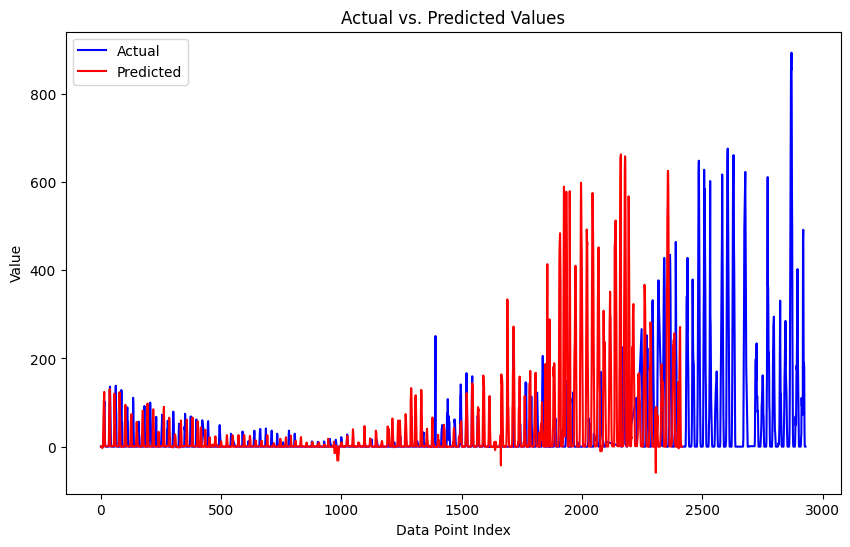

In [472]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

### Testing

In [473]:
combined_A = pd.concat([training_A, validation_A], axis=0, ignore_index=True)
combined_A.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_A['pv_measurement']

X_train = combined_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_A = test_A.drop(columns=['date_forecast'])
test_A = test_A.drop(columns=['date_calc'])

modelA2 = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelA2.fit(X_train[selected_features_A['Feature']], y_train)

# Make predictions on the test set
y_pred_A = modelA2.predict(test_A[selected_features_A['Feature']])

In [ ]:
combined_B = pd.concat([training_B, validation_B], axis=0, ignore_index=True)
combined_B.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_B['pv_measurement']

X_train = combined_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_B = test_B.drop(columns=['date_calc'])
test_B = test_B.drop(columns=['date_forecast'])

modelB2 = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelB2.fit(X_train[selected_features_B['Feature']], y_train)

# Make predictions on the test set
y_pred_B = modelB2.predict(test_B[selected_features_B['Feature']])

In [ ]:
combined_C = pd.concat([training_C, validation_C], axis=0, ignore_index=True)
combined_C.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_C['pv_measurement']

X_train = combined_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_C = test_C.drop(columns=['date_calc'])
test_C = test_C.drop(columns=['date_forecast'])

modelC2 = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelC2.fit(X_train[selected_features_C['Feature']], y_train)

# Make predictions on the test set
y_pred_C = modelC2.predict(test_C[selected_features_C['Feature']])

In [ ]:
test_pred_all = np.concatenate((y_pred_A, y_pred_B, y_pred_C), axis=0)

test_pred_all2 = np.where(test_pred_all < 0, 0, test_pred_all)

In [ ]:
test3 = pd.read_csv('../test.csv')
sample_submission = pd.read_csv('../sample_submission.csv')
test3['prediction'] = test_pred_all2
sample_submission = sample_submission[['id']].merge(test3[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('../Submissions/submission_31.csv', index=False)